<a href="https://colab.research.google.com/github/Sushmitha-Katti/ERA/blob/main/Session_11-CAMS_LRs_Optimizers/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Albumentation and Apex Package**

In [1]:
!pip install --no-cache-dir git+https://github.com/albu/albumentations


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-jbkvgroq
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-jbkvgroq
  Resolved https://github.com/albu/albumentations to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done


## **Clone the Code**

In [2]:
!git clone https://github.com/Sushmitha-Katti/ERA.git

Cloning into 'ERA'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 225 (delta 36), reused 21 (delta 4), pack-reused 167
Receiving objects: 100% (225/225), 1.63 MiB | 31.55 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [11]:
# Navigate to the directory
cd /content/ERA/Session_11-CAMS_LRs_Optimizers


In [12]:
# list the file
ls

main.go  models/  utils/


## **Abumentation Transforms**

In [19]:
import albumentations as A
from torchvision import transforms
import albumentations as A
import albumentations.pytorch as AP
import random
import numpy as np

from torchvision import transforms
import albumentations as A
import albumentations.pytorch as AP
import random
import numpy as np

from utils.albumentation_transforms import AlbumentationTransforms

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)

train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=2, max_h_size=9,max_w_size = 9,p=0.7)
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])





/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


## **Load Train Test Data**

In [20]:
from utils.train_test_loader import *

classes, trainloader, testloader = load(train_transform,test_transform)

100%|██████████| 170498071/170498071 [00:13<00:00, 13105988.53it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## **Some training data**

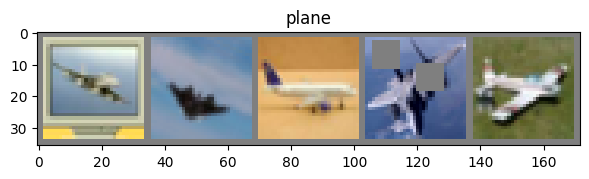

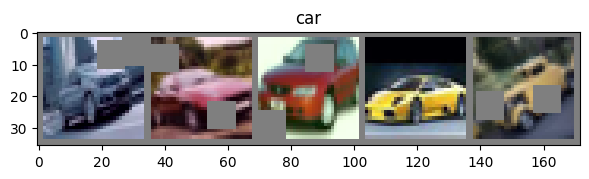

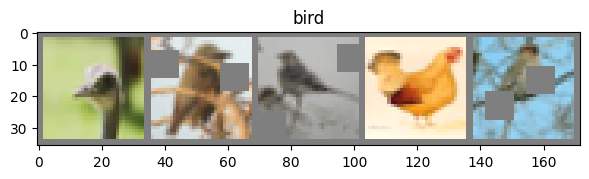

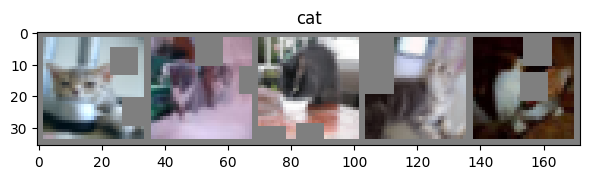

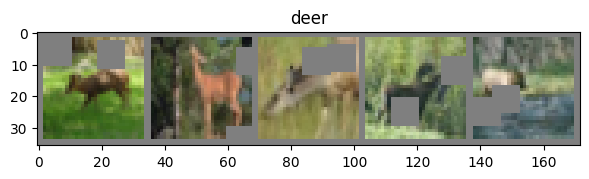

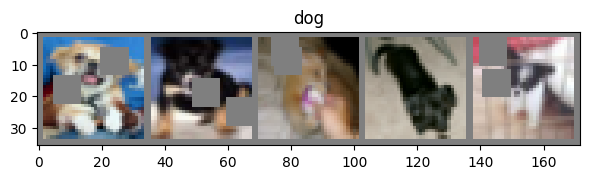

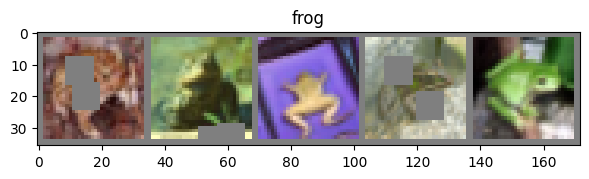

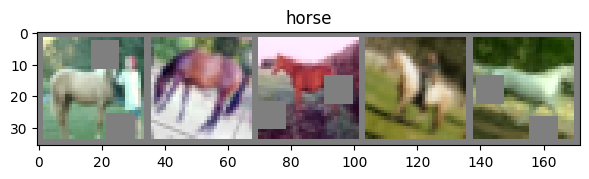

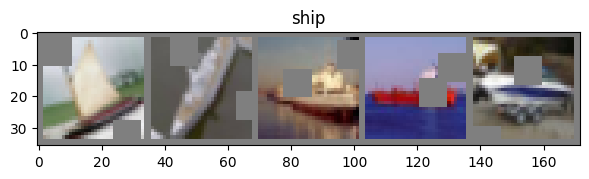

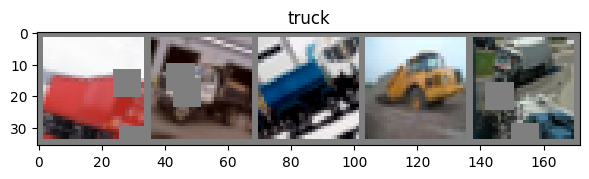

In [21]:
%matplotlib inline
import torch

from utils.show_images import *


def show_train_data(dataset, classes):

	# get some random training images

  dataiter = iter(dataset)
  images, labels = next(dataiter)
  for i in range(10):
    index = [j for j in range(len(labels)) if labels[j] == i]
    imshow(torchvision.utils.make_grid(images[index[0:5]],nrow=5,padding=2,scale_each=True),classes[i])
show_train_data(trainloader, classes)

## **Print Model Summary**

In [41]:
from models.resnet import ResNet18
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18(dropout=0.0).to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## **Initialise Loss funtion, Optimizer, Schedular**

In [42]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9 ,weight_decay = 0.0001)
scheduler = ReduceLROnPlateau(optimizer, patience = 3,min_lr=1e-4)

## **Train the Model for 20 Epochs**

In [43]:
from  main import run

EPOCHS = 20
train_acc, train_loss, test_acc, test_loss = run(model, device, trainloader, testloader, optimizer, criterion, EPOCHS)



EPOCH: 1 LR: 0.01


Loss=1.2897684574127197 Batch_id=390 Accuracy=46.99: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]



Test set: Average loss: 0.0091, Accuracy: 5937/10000 (59.37%)

EPOCH: 2 LR: 0.01


Loss=0.98316490650177 Batch_id=390 Accuracy=63.11: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]



Test set: Average loss: 0.0063, Accuracy: 7230/10000 (72.30%)

EPOCH: 3 LR: 0.01


Loss=0.8469747304916382 Batch_id=390 Accuracy=69.91: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.0071, Accuracy: 6893/10000 (68.93%)

EPOCH: 4 LR: 0.01


Loss=0.6379601359367371 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [00:47<00:00,  8.26it/s]



Test set: Average loss: 0.0052, Accuracy: 7781/10000 (77.81%)

EPOCH: 5 LR: 0.01


Loss=0.8012886047363281 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.0046, Accuracy: 8079/10000 (80.79%)

EPOCH: 6 LR: 0.01


Loss=0.39685893058776855 Batch_id=390 Accuracy=78.53: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.0058, Accuracy: 7685/10000 (76.85%)

EPOCH: 7 LR: 0.01


Loss=0.5708805918693542 Batch_id=390 Accuracy=80.54: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0042, Accuracy: 8227/10000 (82.27%)

EPOCH: 8 LR: 0.01


Loss=0.5565882921218872 Batch_id=390 Accuracy=81.92: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.0039, Accuracy: 8371/10000 (83.71%)

EPOCH: 9 LR: 0.01


Loss=0.5649213194847107 Batch_id=390 Accuracy=83.25: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.0043, Accuracy: 8240/10000 (82.40%)

EPOCH: 10 LR: 0.01


Loss=0.7997103929519653 Batch_id=390 Accuracy=84.08: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.0035, Accuracy: 8573/10000 (85.73%)

EPOCH: 11 LR: 0.01


Loss=0.5723212361335754 Batch_id=390 Accuracy=84.86: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.0038, Accuracy: 8472/10000 (84.72%)

EPOCH: 12 LR: 0.01


Loss=0.5180718898773193 Batch_id=390 Accuracy=85.94: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]



Test set: Average loss: 0.0033, Accuracy: 8679/10000 (86.79%)

EPOCH: 13 LR: 0.01


Loss=0.46398720145225525 Batch_id=390 Accuracy=86.64: 100%|██████████| 391/391 [00:46<00:00,  8.40it/s]



Test set: Average loss: 0.0035, Accuracy: 8536/10000 (85.36%)

EPOCH: 14 LR: 0.01


Loss=0.32826507091522217 Batch_id=390 Accuracy=87.16: 100%|██████████| 391/391 [00:46<00:00,  8.36it/s]



Test set: Average loss: 0.0039, Accuracy: 8411/10000 (84.11%)

EPOCH: 15 LR: 0.01


Loss=0.20058369636535645 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]



Test set: Average loss: 0.0033, Accuracy: 8616/10000 (86.16%)

EPOCH: 16 LR: 0.01


Loss=0.4409857392311096 Batch_id=390 Accuracy=88.39: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.0039, Accuracy: 8434/10000 (84.34%)

EPOCH: 17 LR: 0.001


Loss=0.2047368735074997 Batch_id=390 Accuracy=91.43: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 0.0023, Accuracy: 9021/10000 (90.21%)

EPOCH: 18 LR: 0.001


Loss=0.18960091471672058 Batch_id=390 Accuracy=92.68: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]



Test set: Average loss: 0.0023, Accuracy: 9057/10000 (90.57%)

EPOCH: 19 LR: 0.001


Loss=0.25471237301826477 Batch_id=390 Accuracy=92.94: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.0023, Accuracy: 9054/10000 (90.54%)

EPOCH: 20 LR: 0.001


Loss=0.10294957458972931 Batch_id=390 Accuracy=93.19: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 0.0022, Accuracy: 9068/10000 (90.68%)



## **Evaluate the class wise accuracy**

In [44]:
from utils.evaluate import *

evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 88 %
Accuracy of   cat : 81 %
Accuracy of  deer : 91 %
Accuracy of   dog : 82 %
Accuracy of  frog : 91 %
Accuracy of horse : 94 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %


## **Plot accurary change in test and train**

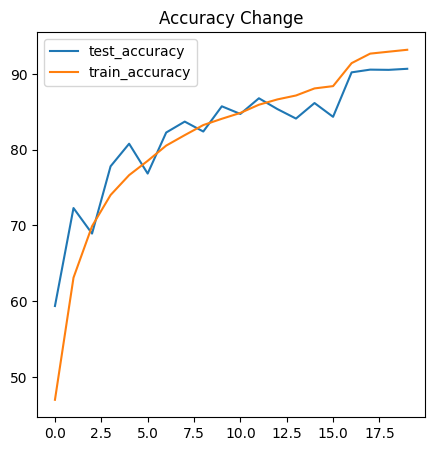

In [59]:
curves = [(test_acc,"test_accuracy"),(train_acc,"train_accuracy")]
plot_curve(curves =curves ,title = "Accuracy Change",Figsize = (5,5))



## **Plot Loss Change in Test**
(Couldn't plot both the train and test loss together because both has different scale. So visualisation will not be proper)

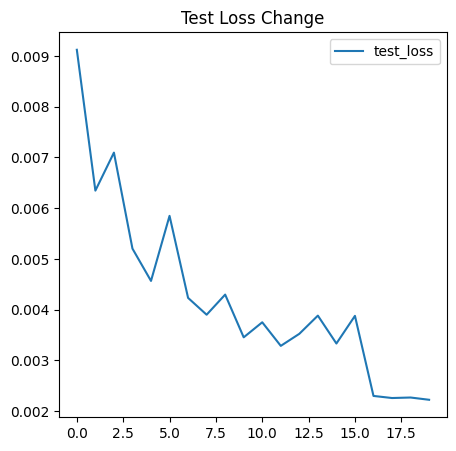

In [60]:
curves = [(test_loss,"test_loss")]
plot_curve(curves =curves ,title = "Test Loss Change",Figsize = (5,5))

## **Plot Loss Change in train**

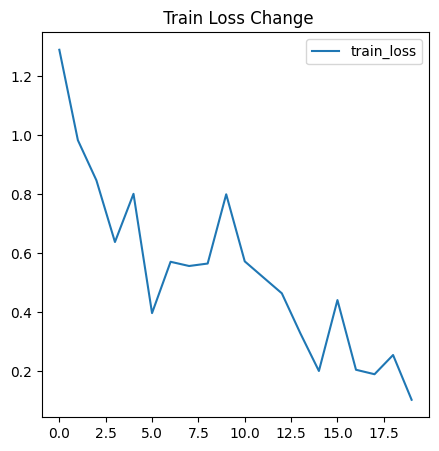

In [61]:
curves = [(train_loss,"train_loss")]
plot_curve(curves =curves ,title = " Train Loss Change",Figsize = (5,5))

## **Extract 25 misclassified_images**

In [62]:
miscalssified_images = show_misclassified_images(model, device, testloader, classes)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## **GradCam View of misclassified images(for all 4 layers)**

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


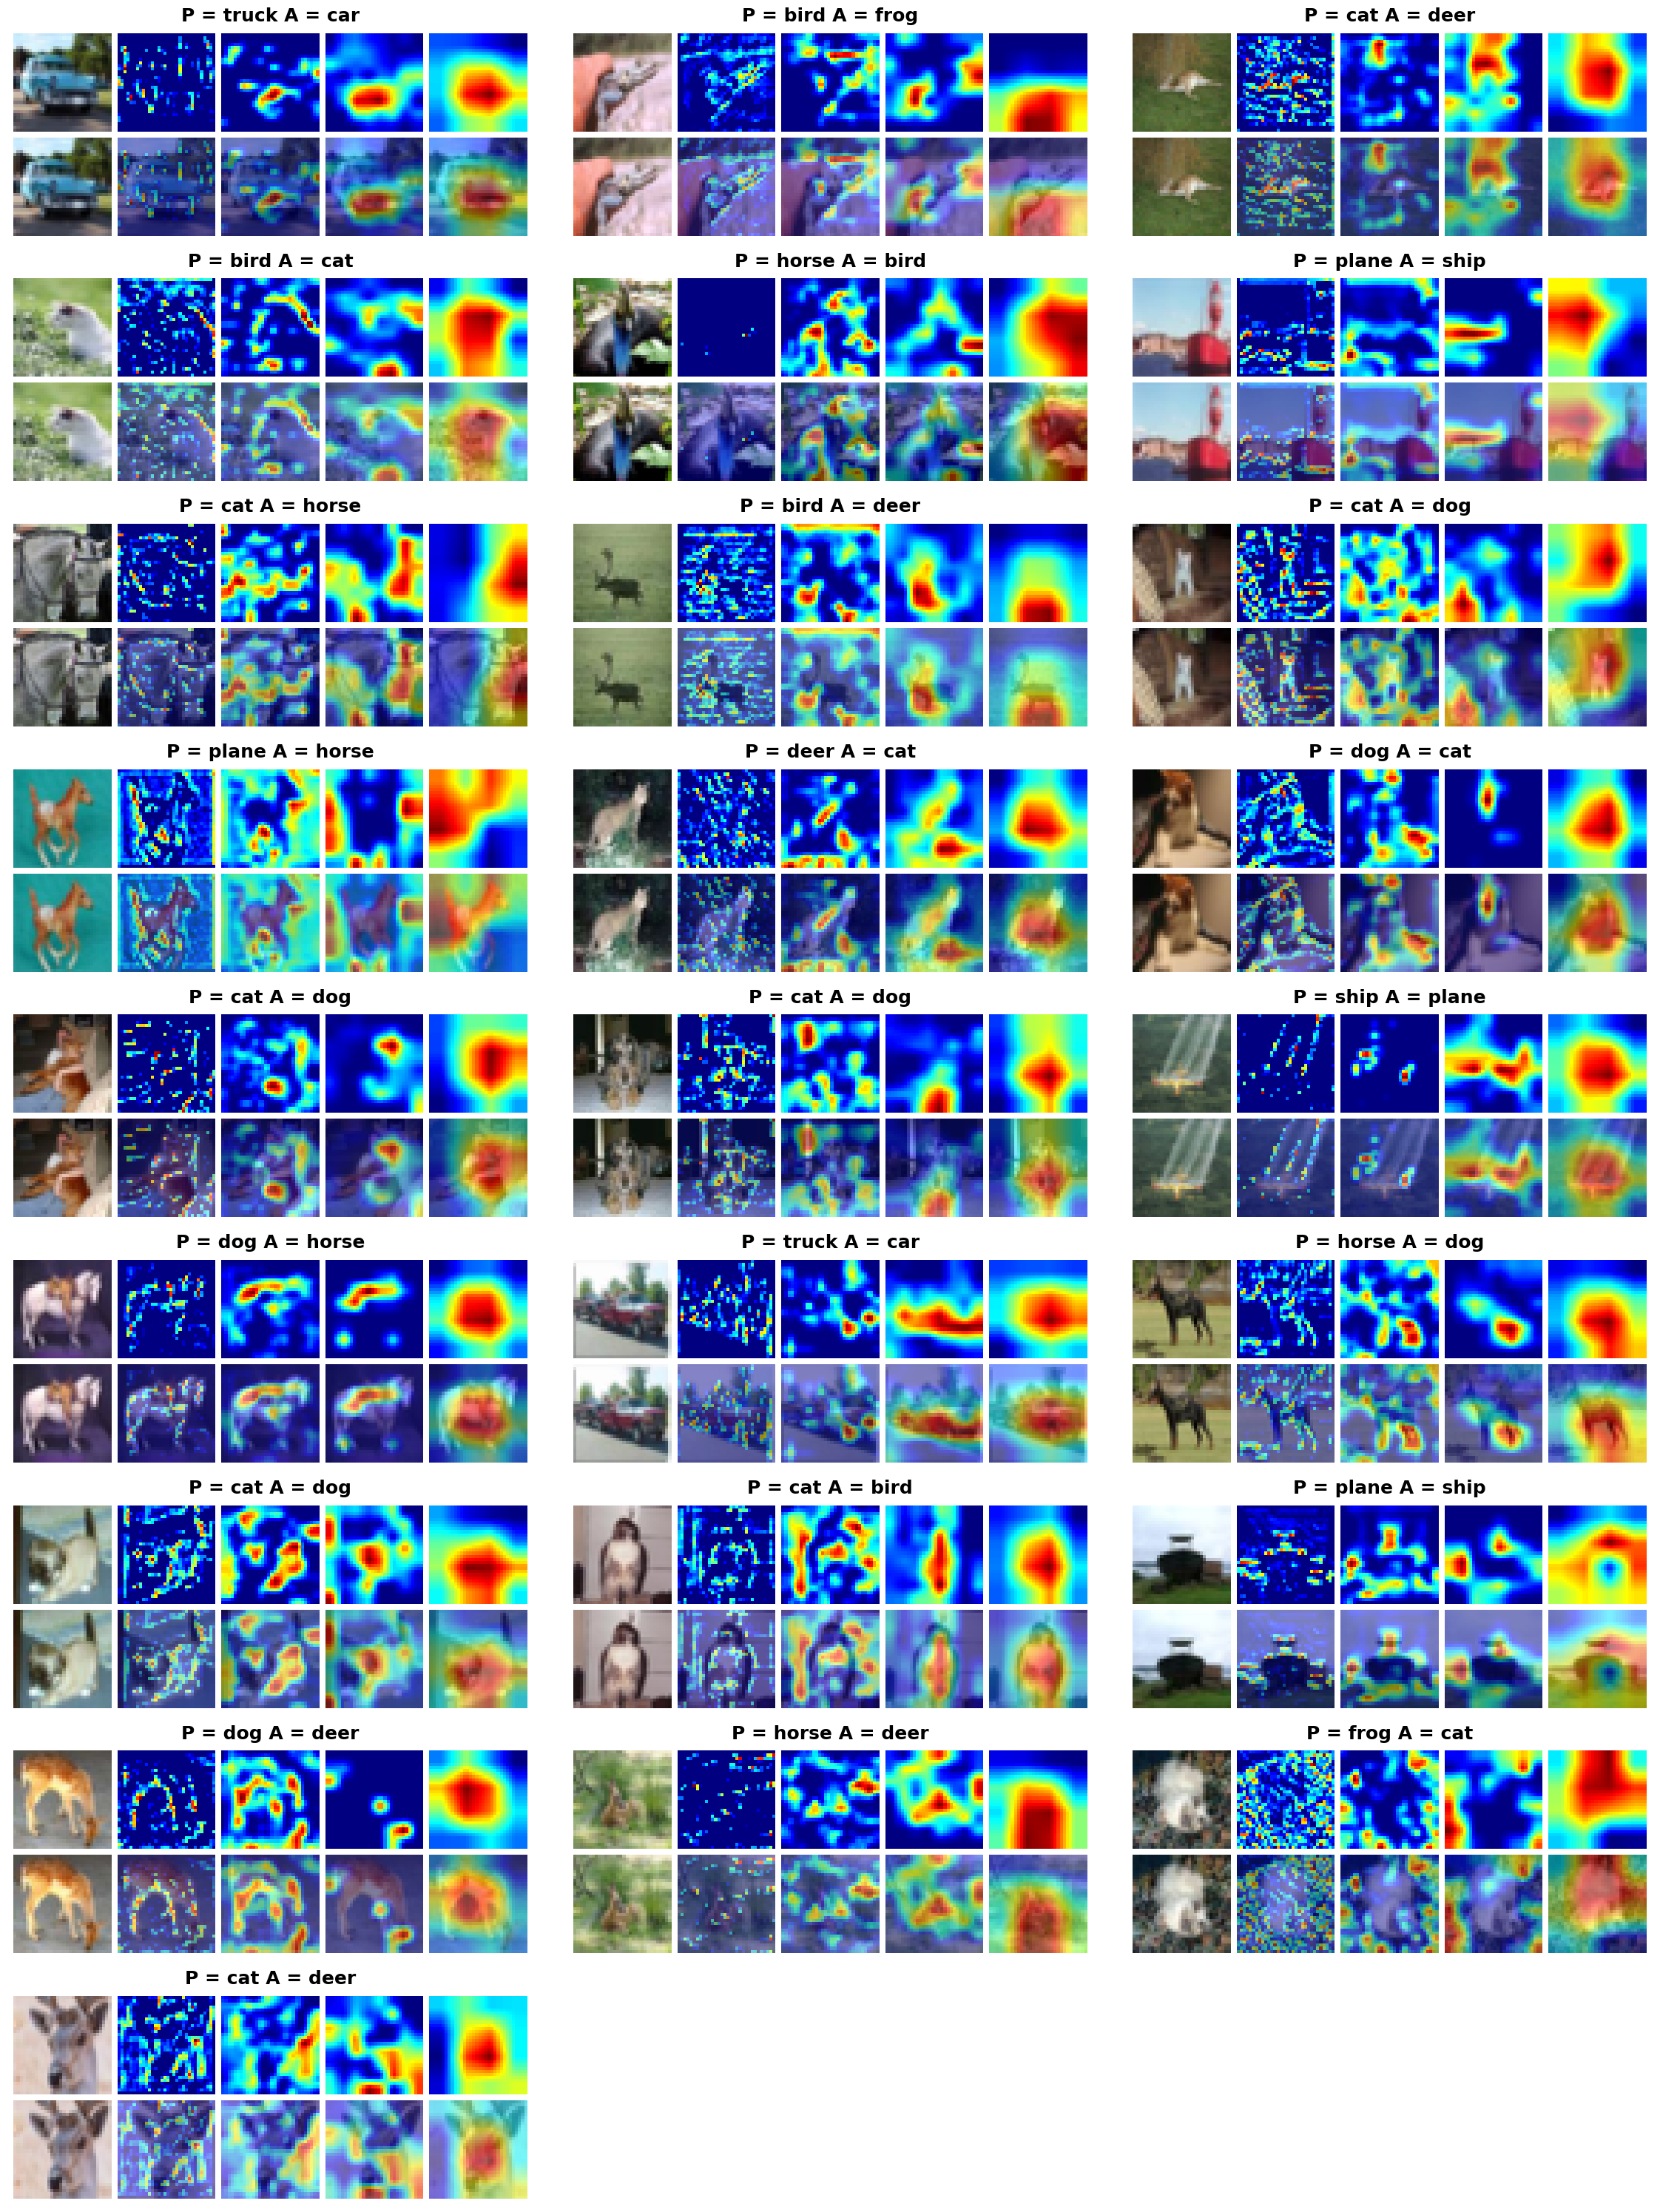

In [63]:
from utils.gradcam import GradCamView
layers = [model.layer1,model.layer2,model.layer3,model.layer4]
miscalssified_images = show_misclassified_images(model, device, testloader, classes)
GradCamView(miscalssified_images,model,classes,layers)
